<a href="https://colab.research.google.com/github/nilkanth02/Projects-using-Tensorflow/blob/main/MNIST.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [27]:
import tensorflow
from tensorflow import keras
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense, Flatten

In [28]:
(X_train , y_train ), (X_test, y_test) = keras.datasets.mnist.load_data()

In [29]:
X_train.shape

(60000, 28, 28)

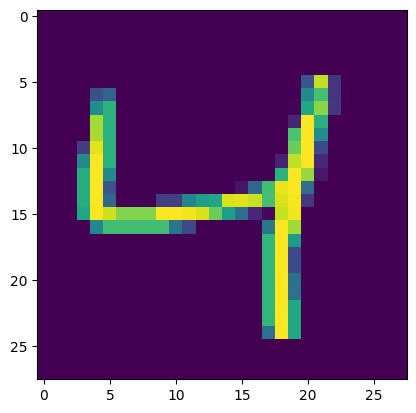

In [30]:
import matplotlib.pyplot as plt
plt.imshow(X_train[2])

In [31]:
X_train = X_train /255
X_test= X_test/255

In [32]:
X_train[0]

array([[0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.    

In [33]:
model = Sequential()

model.add(Flatten(input_shape=(28, 28)))
model.add(Dense(128, activation ='relu'))
model.add(Dense(10, activation='softmax'))

In [34]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_1 (Flatten)         (None, 784)               0         
                                                                 
 dense_2 (Dense)             (None, 128)               100480    
                                                                 
 dense_3 (Dense)             (None, 10)                1290      
                                                                 
Total params: 101770 (397.54 KB)
Trainable params: 101770 (397.54 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [35]:
model.compile(loss='sparse_categorical_crossentropy', optimizer='Adam', metrics=['accuracy'])


In [36]:
history = model.fit(X_train, y_train, epochs=10, validation_split = 0.2)

Epoch 1/10
1500/1500 [==============================] - 5s 3ms/step - loss: 0.2900 - accuracy: 0.9176 - val_loss: 0.1528 - val_accuracy: 0.9568
Epoch 2/10
1500/1500 [==============================] - 4s 3ms/step - loss: 0.1316 - accuracy: 0.9609 - val_loss: 0.1191 - val_accuracy: 0.9653
Epoch 3/10
1500/1500 [==============================] - 4s 3ms/step - loss: 0.0892 - accuracy: 0.9736 - val_loss: 0.1025 - val_accuracy: 0.9690
Epoch 4/10
1500/1500 [==============================] - 4s 3ms/step - loss: 0.0667 - accuracy: 0.9799 - val_loss: 0.0896 - val_accuracy: 0.9725
Epoch 5/10
1500/1500 [==============================] - 4s 3ms/step - loss: 0.0498 - accuracy: 0.9850 - val_loss: 0.0833 - val_accuracy: 0.9759
Epoch 6/10
1500/1500 [==============================] - 4s 3ms/step - loss: 0.0389 - accuracy: 0.9887 - val_loss: 0.0909 - val_accuracy: 0.9747
Epoch 7/10
1500/1500 [==============================] - 4s 3ms/step - loss: 0.0307 - accuracy: 0.9909 - val_loss: 0.0875 - val_accuracy:

In [43]:
history

In [37]:
y_prob = model.predict(X_test)

313/313 [==============================] - 1s 1ms/step


In [38]:
y_prob

array([[1.71796577e-09, 2.21056909e-10, 9.13772435e-09, ...,
        9.99954402e-01, 3.00900549e-09, 6.24365271e-07],
       [2.08147822e-11, 1.21067942e-05, 9.99986827e-01, ...,
        1.80956917e-14, 4.05752900e-07, 5.53141208e-16],
       [2.14492104e-07, 9.99457479e-01, 9.29250200e-06, ...,
        3.62784704e-05, 4.79389215e-04, 4.15472016e-07],
       ...,
       [9.72057244e-18, 2.74669203e-14, 1.52485904e-14, ...,
        3.54785978e-10, 1.36543598e-11, 1.18593704e-07],
       [1.58274205e-13, 6.93523811e-14, 1.09639243e-16, ...,
        5.03362712e-14, 1.94526217e-09, 6.67230146e-14],
       [2.30394935e-12, 1.69607442e-15, 6.98857291e-12, ...,
        5.25667906e-16, 4.19376109e-14, 2.77669164e-13]], dtype=float32)

In [39]:
y_pred =  y_prob.argmax(axis=1)

In [40]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test, y_pred)

0.9771

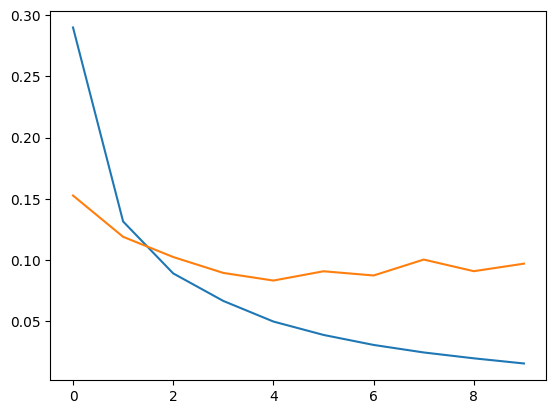

In [41]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])

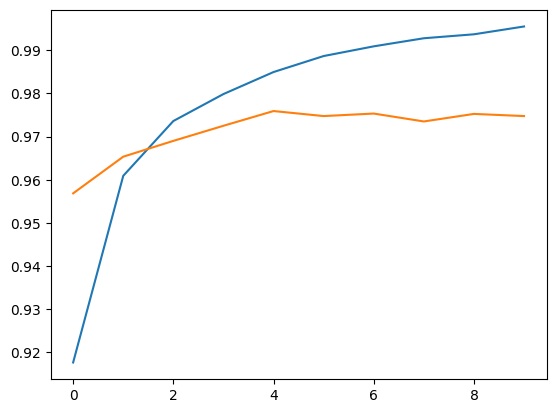

In [44]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])

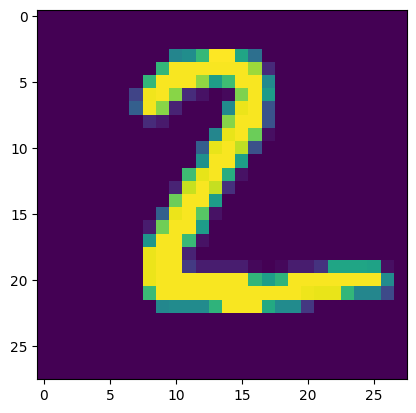

In [52]:
plt.imshow(X_test[1])

In [54]:
model.predict(X_test[1].reshape(1, 28, 28)).argmax(axis=1)

1/1 [==============================] - 0s 23ms/step


array([2])